### Problem Statement

### The client is a technology-driven mobility platform in India. It aims to empower residents in cities to create a paradigm shift in the mobility industry, by making the urban commute more efficient and eco-friendly. Using Micro Mobility Vehicles (MMVs) through a user-friendly mobile app, they enables first and last-mile connectivity that is seamless, shared and sustainable.

### They are seeing a slump in sales and is looking to identify the key factors that influence the demand for their products based on the data collected so far. The factors could be economic, demographic, seasonal etc. Primary focus in this analysis is on seasonal factors and office going patterns. The goal is to use hypothesis testing to help identify which factors have an effect on the sales to help them narrow down on the key areas of focus.

In [110]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [111]:
# Importing the dataset and creating a Pandas Dataframe
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [112]:
# Printing the first 5 rows of the Dataframe
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1. Exploratory Data Analysis

### 1.1 Primary Analysis

In [113]:
# Shape of the dataset
df.shape

(10886, 12)

In [114]:
# Summary of columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [115]:
# Statistical Summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 1. The dataset has 10886 rows and 12 columns
### 2. 8 columns are of integer data type, 3 of float data type and 1 of object datatype
### 3. The datetime column is of object datatype and needs to be converted to datetime type. Also, season, holiday, workingday and weather are categorical columns and need to be converted.
### 3. There are no missing values in any of the columns
### 4. The statistical analysis gives the following insights
###     4.1 75% of values in weather column lie below 2 which means there were very few days with light snow or heavy rain
###     4.2 Mean and Median temp is around 20 degree Celsius with a maximum of 41
###     4.3 Mean humidity is 61 with a maximum value of 100
###     4.4 Mean windspeed is 12.8 with maximum of 56.9 indicating presence of outliers
###     4.5 The maximum number of total customers in a time of the day was 977 and minimum was 1. The mean value is 191 and there is a good chance of outlier presence 

### 1.2 Non Graphical Analysis

In [116]:
# Converting datetime column into datetime datatype
df['datetime']=pd.to_datetime(df['datetime'])

In [117]:
#Checking updated info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [118]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [119]:
a=df.groupby(df['datetime'].dt.date)['holiday'].mean().reset_index()
a['holiday'].value_counts()

0.0    443
1.0     13
Name: holiday, dtype: int64

In [120]:
a=df.groupby(df['datetime'].dt.date)['workingday'].mean().reset_index()
a['workingday'].value_counts()

1.0    311
0.0    145
Name: workingday, dtype: int64

In [121]:
# Number of unique days in the data
df['datetime'].dt.date.nunique()

456

In [122]:
# Number of unique years in the data
df['datetime'].dt.year.nunique()

2

In [123]:
# End date in the data
df['datetime'].dt.date.max()

datetime.date(2012, 12, 19)

In [124]:
# Start date in the data
df['datetime'].dt.date.min()

datetime.date(2011, 1, 1)

In [125]:
# Day with maximum customers
df.groupby('datetime')['count'].sum().sort_values(ascending=False)

datetime
2012-09-12 18:00:00    977
2012-09-11 17:00:00    970
2012-09-10 18:00:00    968
2012-10-10 17:00:00    948
2012-10-16 17:00:00    943
                      ... 
2011-03-02 04:00:00      1
2011-05-04 03:00:00      1
2011-04-12 03:00:00      1
2011-02-12 05:00:00      1
2012-04-04 04:00:00      1
Name: count, Length: 10886, dtype: int64

### 1. The dataset covers data for 2 years from 2011-01-01 to 2012-12-19
### 2. The count of users has been taken for 456 days across multiple times in a day
### 3. The maximum number of customers in a day was 977 on 12th September, 2012

### 1.3 Univariate Analysis

### 1. Season

<AxesSubplot:xlabel='season', ylabel='count'>

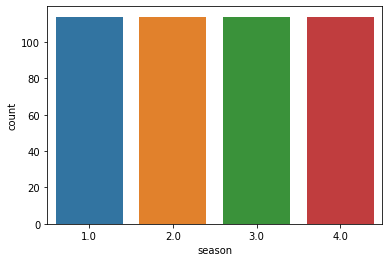

In [126]:
# Determining the season on each date and plotting the count of each season
a=df.groupby(df['datetime'].dt.date)['season'].mean().reset_index()
sns.countplot(data=a,x=a['season'])

### Both the years combined, saw an equal number of days across seasons of spring, summer, fall and winter

### 2. Holiday

<AxesSubplot:xlabel='holiday', ylabel='count'>

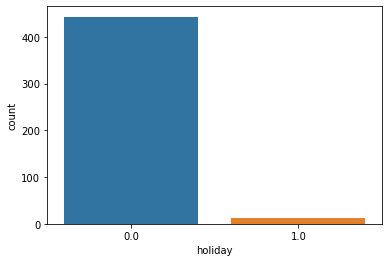

In [127]:
# Determining if it was a holiday on each date and plotting the count of holidays
a=df.groupby(df['datetime'].dt.date)['holiday'].mean().reset_index()
sns.countplot(data=a,x=a['holiday'])

### The number of public holidays across both the years were around 13

### 3. Workingday

<AxesSubplot:xlabel='workingday', ylabel='count'>

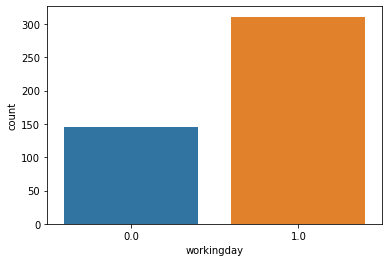

In [128]:
# Determining if it was a workingday on each date and plotting the count of workingdays vs non-working days
a=df.groupby(df['datetime'].dt.date)['workingday'].mean().reset_index()
sns.countplot(data=a,x=a['workingday'])

### There were around 150 days of holidays across both years combining both weekends and holidays

### 4. Weather

<AxesSubplot:xlabel='weather', ylabel='Count'>

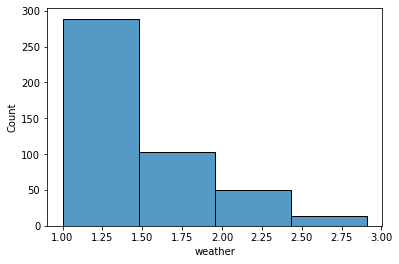

In [129]:
# Determining average weather for each date and plotting the count in bins
a=df.groupby(df['datetime'].dt.date)['weather'].mean().reset_index()
sns.histplot(data=a,x=a['weather'],bins=4)

### Most days across the years saw clear weather with a very few days having extreme conditions of snow or heavy rain

### 5. Temperature

<AxesSubplot:xlabel='temp'>

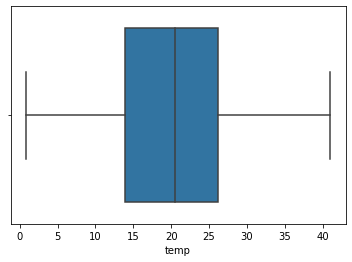

In [130]:
# Determining average temperature across dates
sns.boxplot(data=df,x=df['temp'])

### Median temperature is around 20 degree Celsius with no outliers observed

### 6. Count

<AxesSubplot:xlabel='count'>

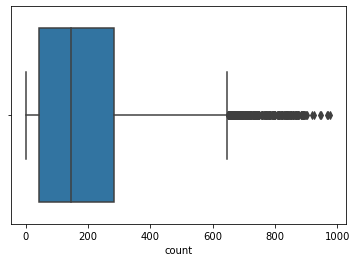

In [131]:
sns.boxplot(data=df,x=df['count'])

### The median count of rental bike users is around 190 with a significant number of outliers observed

### 1.4. Bivariate Analysis

### 1. Datetime vs Count

<AxesSubplot:xlabel='datetime', ylabel='count'>

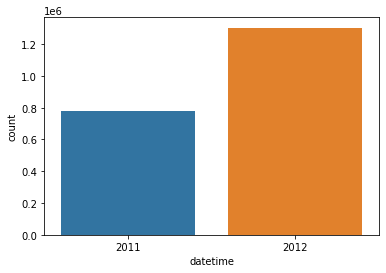

In [132]:
# Plot of number of users across years
a=df.groupby(df['datetime'].dt.year)['count'].sum().reset_index()
sns.barplot(x='datetime',y='count',data=a)

<AxesSubplot:xlabel='datetime', ylabel='count'>

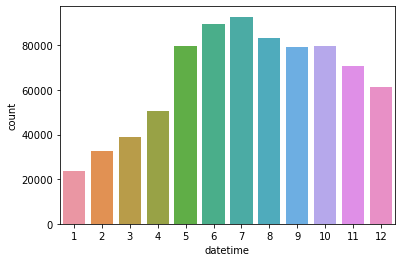

In [133]:
# Plot of number of users across months for 2011
a=df[df['datetime'].dt.year==2011]
a=a.groupby(df['datetime'].dt.month)['count'].sum().reset_index()
sns.barplot(x='datetime',y='count',data=a)

<AxesSubplot:xlabel='datetime', ylabel='count'>

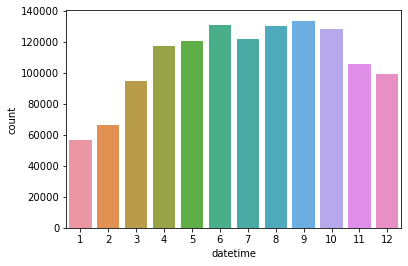

In [134]:
# Plot of number of users across months for 2012
a=df[df['datetime'].dt.year==2012]
a=a.groupby(df['datetime'].dt.month)['count'].sum().reset_index()
sns.barplot(x='datetime',y='count',data=a)

### The number of users increased significantly from 2011 to 2012
### From the analysis across months, it can be observed the number fo users is lowest in the months of January, February and March. There is an increase seen after that with the months from May to October and again a dip in November and December

### 2. Season vs Count

<AxesSubplot:xlabel='season', ylabel='count'>

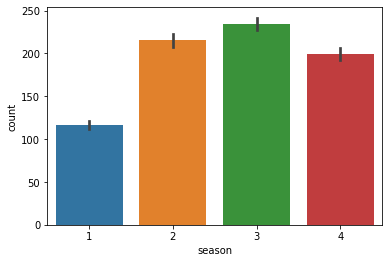

In [189]:
# Sum of users across Seasons
sns.barplot(data=df,x=df['season'],y=df['count'])

<AxesSubplot:xlabel='season', ylabel='count'>

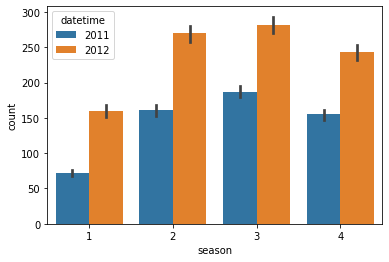

In [190]:
# Plot across the years
sns.barplot(data=df,x=df['season'],y=df['count'],hue=df['datetime'].dt.year)

### They had more users renting bikes during Summer and Fall with Spring being the least popular among users. The pattern is consistent across both years

### 3. Holiday vs Count

<AxesSubplot:xlabel='holiday', ylabel='count'>

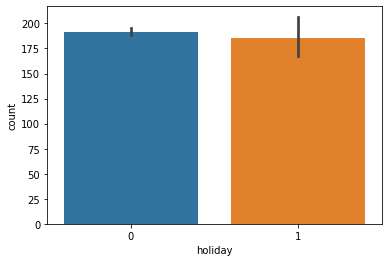

In [157]:
# Average number of users on holidays
sns.barplot(data=df,x=df['holiday'],y=df['count'])

<AxesSubplot:xlabel='holiday', ylabel='count'>

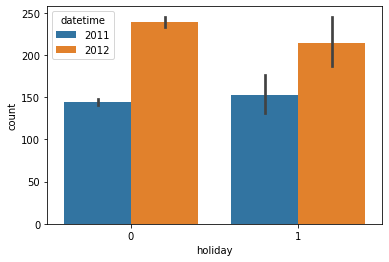

In [158]:
# Plot across years
sns.barplot(data=df,x=df['holiday'],y=df['count'],hue=df['datetime'].dt.year)

### The average number of users on holidays is almost equal to that on other days. Hence users are leveraging the services equally on both holidays and non-holidays. The pattern is consistent across years.

### 4. Workingday vs Count

<AxesSubplot:xlabel='workingday', ylabel='count'>

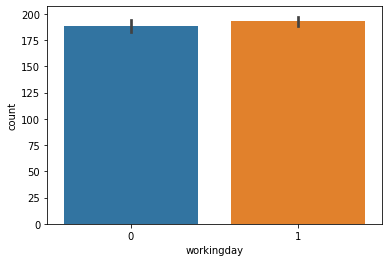

In [161]:
# Average number of users on workingdays and non-working days
sns.barplot(data=df,x=df['workingday'],y=df['count'])

<AxesSubplot:xlabel='workingday', ylabel='count'>

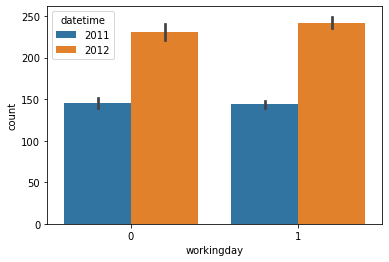

In [170]:
# Plot across years
sns.barplot(data=df,x=df['workingday'],y=df['count'],hue=df['datetime'].dt.year)

### The  average number of users on non working days is almost equal to that on working days. Hence the demand for the bikes seems to be equal on both working and non-working days. The pattern is consistent across years.

### 5. Weather vs Count

<AxesSubplot:xlabel='weather', ylabel='count'>

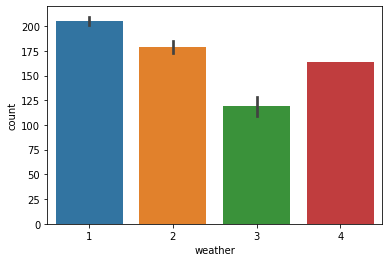

In [174]:
# Plot of average number of users in different weather conditions
sns.barplot(data=df,x=df['weather'],y=df['count'])

<AxesSubplot:xlabel='weather', ylabel='count'>

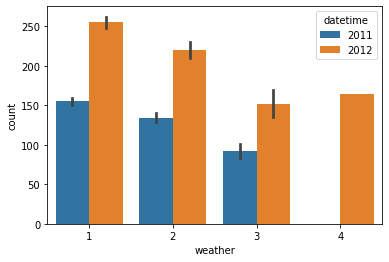

In [263]:
# Plot the patterns across years
sns.barplot(data=df,x=df['weather'],y=df['count'],hue=df['datetime'].dt.year)

### The most number of bikes rented were during clear weather followed by mist + cloudy weather. The times of days with snow and heavy rain also saw an average above 100, however the number of days with snow and rain are very less to make definite conclusions

### 6. Temperature, Humidity and Windspeed vs Count

<AxesSubplot:>

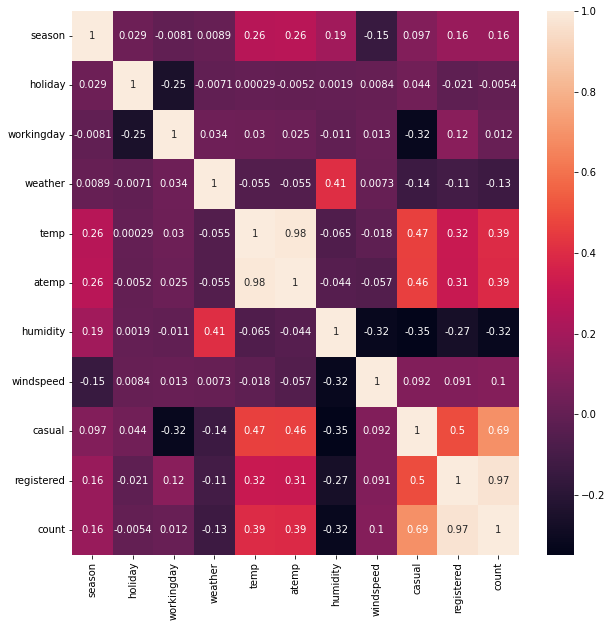

In [178]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### We can observe that there is a weak positive correlation between temperature, feeling temperature and the count of users. 
### There is a weak negative correlation between humidity and count of users. 
### At a high level, count of users is more at higher temperatures and lower when humidity increases.

### 1.5 Insights based on EDA

#### 1.	Both the years combined, saw an equal number of days across seasons of spring, summer, fall and winter
#### 2.	The number of public holidays across both the years were around 13
#### 3.	There were around 150 days of holidays across both years combining both weekends and holidays
#### 4.	Most days across the years saw clear weather with a very few days having extreme conditions of snow or heavy rain
#### 5.	Median temperature is around 20 degree Celsius with no outliers observed
#### 6.	The median count of rental bike users is around 190 with a significant number of outliers observed
#### 7.	The number of users increased significantly from 2011 to 2012
#### 8.	From the analysis across months, it can be observed the number fo users is lowest in the months of January, February and March. There is an increase seen after that with the months from May to October and again a dip in November and December
#### 9.	They had more users renting bikes during Summer and Fall with Spring being the least popular among users. The pattern is consistent across both years
#### 10.	Even though the total number of users on holidays is less owing to less number of holidays, the average number of users is almost equal to that on other days. Hence users are leveraging the services equally on both holidays and non-holidays. The pattern is consistent across years.
#### 11.	The total number of users on weekends and holidays combined is less owing to less number of holidays. However, the average number of users on non working days is almost equal to that on working days. Hence the demand  seems to be equal on both working and non-working days. The pattern is consistent across years.
#### 12.	The most number of bikes rented were during clear weather followed by mist + cloudy weather. The times of days with snow and heavy rain also saw an average above 100, however the number of days with snow and rain are very less to make definite conclusions
#### 13.	We can observe that there is a weak positive correlation between temperature, feeling temperature and the count of users.
#### 14.	There is a weak negative correlation between humidity and count of users.
#### 15.	At a high level, count of users is more at higher temperatures and lower when humidity increases.

### 2. Hypothesis testing

### 2.1 Checking if Working Days has an effect on the number of electric cycles rented

<AxesSubplot:xlabel='workingday', ylabel='count'>

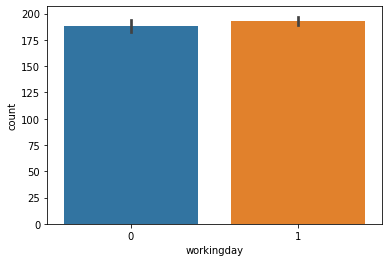

In [180]:
# 1. Visual Analysis
sns.barplot(data=df,x=df['workingday'],y=df['count'])

### The average number of users is almost equal on both working and non working days

#### 2. Hypothesis Formulation
#### H0 : Working Days has no effect on the number of electric cycles rented
#### Ha : Working days has an effect on the number of electric cycles rented

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Working day) against a continous variable(count) and we have sample data
#### So we will be using the 2 sample T-Test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset
####   2. Data is obtained from a random sample in the population - True for this dataset
####   3. Data values are continous - Count value is continous

<AxesSubplot:xlabel='count', ylabel='Count'>

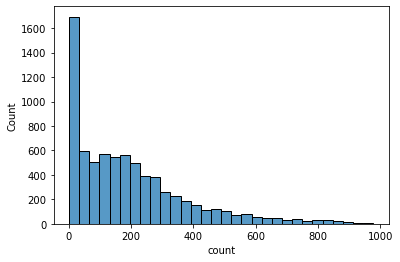

In [213]:
# Check Test Assumptions
# 4. Data is normally distributed
a=df[df['workingday']==1]
b=df[df['workingday']==0]
sns.histplot(a['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

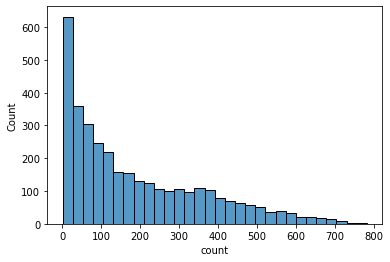

In [214]:
sns.histplot(b['count'],bins=30)

#### The data does not seem bell shaped, so the assumption does not hold true

In [183]:
# 4. Check Test Assumptions
# 5. Variances for 2 independent groups are equal
a.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7412.000000,7412.0,7412.0,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000
mean,2.500405,0.0,1.0,1.433081,20.390696,23.798153,61.743119,12.874143,25.107663,167.904209,193.011873
std,1.114241,0.0,0.0,0.646322,7.754755,8.410190,19.274729,8.172040,28.601591,165.817966,184.513659
min,1.000000,0.0,1.0,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.0,1.0,1.000000,13.940000,16.665000,47.000000,7.001500,3.000000,36.000000,41.000000
50%,2.000000,0.0,1.0,1.000000,20.500000,24.240000,61.000000,12.998000,14.000000,127.000000,151.000000
75%,3.000000,0.0,1.0,2.000000,26.240000,31.060000,77.000000,16.997900,39.000000,233.000000,277.000000
max,4.000000,0.0,1.0,4.000000,38.540000,43.940000,100.000000,51.998700,240.000000,886.000000,977.000000


In [184]:
b.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,3474.000000,3474.000000,3474.0,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.00000,3474.000000
mean,2.519862,0.089522,0.0,1.387162,19.889839,23.349837,62.192286,12.639916,59.308290,129.19833,188.506621
std,1.120334,0.285537,0.0,0.605253,7.859863,8.603684,19.180711,8.147390,72.669078,108.65734,173.724015
min,1.000000,0.000000,0.0,1.000000,3.280000,2.275000,12.000000,0.000000,0.000000,0.00000,1.000000
25%,2.000000,0.000000,0.0,1.000000,13.940000,16.665000,47.000000,7.001500,6.000000,36.00000,44.000000
50%,3.000000,0.000000,0.0,1.000000,18.860000,22.725000,62.000000,11.001400,25.000000,99.00000,128.000000
75%,4.000000,0.000000,0.0,2.000000,26.240000,31.060000,78.000000,16.997900,90.000000,207.00000,304.000000
max,4.000000,1.000000,0.0,3.000000,41.000000,45.455000,100.000000,56.996900,367.000000,601.00000,783.000000


#### The standard deviation of count is almost similar in both the groups and so equal variances can be assumed

In [185]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
t_stat,p_value=ttest_ind(a['count'],b['count'])
print(t_stat)
print(p_value)

1.2096277376026694
0.22644804226361348


In [187]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


### Based on the 2 sample T-Test, we fail to reject the null hypothesis. So we can confirm that working days has no effect on the number of electric cycles rented as is seen in the visual analysis also.

### 2.2 Checking if weather has an effect on the number of electric cycles rented

<AxesSubplot:xlabel='weather', ylabel='count'>

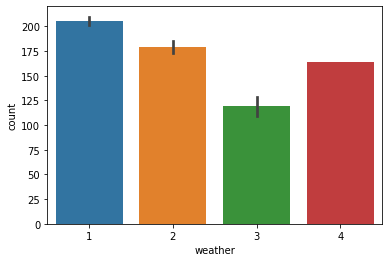

In [188]:
# 1. Visual Analysis
sns.barplot(data=df,x=df['weather'],y=df['count'])

### The number of cycles rented is more during clear weather followed by misty + cloudy weather. It was least during light snowfall. 

#### 2. Hypothesis Formulation
#### H0 : Weather has no effect on the number of electric cycles rented
#### Ha : Weather has an effect on the number of electric cycles rented

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Weather) with more than 2 features against a continous variable(count) 
#### So we will be using the ANOVA test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset

<AxesSubplot:xlabel='count', ylabel='Count'>

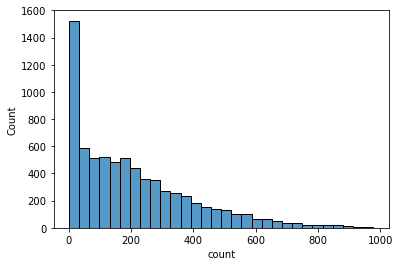

In [212]:
# Check Test Assumptions
# 2. Data is normally distributed (Category 4 of weather is being ignored since there is only 1 data point)
a=df[df['weather']==1]
b=df[df['weather']==2]
c=df[df['weather']==3]
sns.histplot(a['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

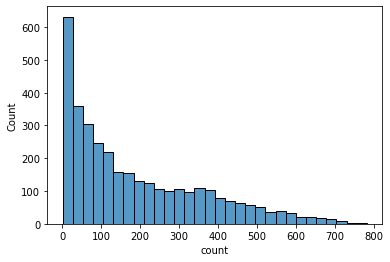

In [215]:
sns.histplot(b['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

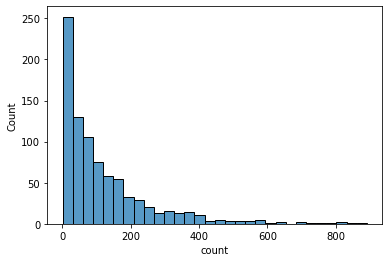

In [216]:
sns.histplot(c['count'],bins=30)

#### The data does not seem bell shaped, so the assumption does not hold true

In [200]:
# 4. Check Test Assumptions
# 5. Variances of different groups are equal
a.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7192.00000,7192.000000,7192.000000,7192.0,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000
mean,2.49708,0.028365,0.672831,1.0,20.557122,23.994126,56.716769,12.892542,40.308676,164.928115,205.236791
std,1.10119,0.166024,0.469212,0.0,8.144427,8.869844,17.652654,8.287707,53.443710,155.294051,187.959566
min,1.00000,0.000000,0.000000,1.0,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,2.00000,0.000000,0.000000,1.0,13.940000,16.665000,43.000000,7.001500,5.000000,41.000000,48.000000
50%,3.00000,0.000000,1.000000,1.0,20.500000,24.240000,56.000000,12.998000,20.000000,130.000000,161.000000
75%,3.00000,0.000000,1.000000,1.0,27.060000,31.060000,70.000000,19.001200,55.000000,236.000000,305.000000
max,4.00000,1.000000,1.000000,1.0,41.000000,45.455000,100.000000,51.998700,367.000000,886.000000,977.000000


In [201]:
b.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2834.000000,2834.000000,2834.000000,2834.0,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,2.530346,0.032463,0.683486,2.0,19.614608,23.072414,69.100565,12.179905,30.785462,148.170078,178.955540
std,1.150498,0.177257,0.465198,0.0,7.172559,7.781651,17.281073,7.600776,43.027108,144.765721,168.366413
min,1.000000,0.000000,0.000000,2.0,3.280000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,2.0,13.940000,16.665000,56.000000,7.001500,4.000000,35.000000,41.000000
50%,2.000000,0.000000,1.000000,2.0,18.860000,22.725000,70.000000,11.001400,15.000000,112.000000,134.000000
75%,4.000000,0.000000,1.000000,2.0,25.420000,29.545000,83.000000,16.997900,40.000000,211.000000,264.000000
max,4.000000,1.000000,1.000000,2.0,39.360000,43.180000,100.000000,47.998800,350.000000,788.000000,890.000000


In [202]:
c.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,859.000000,859.000000,859.000000,859.0,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,2.509895,0.017462,0.739232,3.0,19.546356,22.753091,81.341094,14.071248,17.442375,101.403958,118.846333
std,1.125393,0.131062,0.439310,0.0,6.449593,6.980990,18.039876,8.731668,31.993259,119.344152,138.581297
min,1.000000,0.000000,0.000000,3.0,3.280000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,3.0,14.760000,17.425000,76.000000,7.999800,1.000000,21.500000,23.000000
50%,2.000000,0.000000,1.000000,3.0,19.680000,23.485000,87.000000,12.998000,6.000000,64.000000,71.000000
75%,4.000000,0.000000,1.000000,3.0,24.600000,27.275000,93.000000,19.001200,18.500000,134.000000,161.000000
max,4.000000,1.000000,1.000000,3.0,37.720000,44.695000,100.000000,56.996900,263.000000,791.000000,891.000000


#### The standard deviation of count is almost similar in all the groups and so equal variances can be assumed

In [204]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
f_stat,p_value=f_oneway(a['count'],b['count'],c['count'])
print(f_stat)
print(p_value)

98.28356881946706
4.976448509904196e-43


In [205]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


### Based on the Anova test, we reject the null hypothesis. So we can confirm that weather does have an effect on the number of electric cycles rented as is seen in the visual analysis also.

### 2.3 Checking if season has an effect on the number of electric cycles rented

<AxesSubplot:xlabel='season', ylabel='count'>

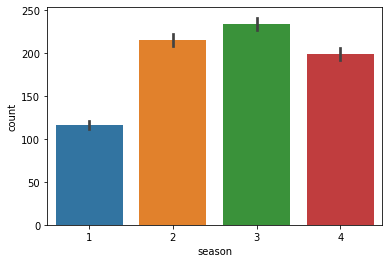

In [217]:
# 1. Visual Analysis
sns.barplot(data=df,x=df['season'],y=df['count'])

### The number of cycles rented is more during fall followed by summer season. It was least during spring. 

#### 2. Hypothesis Formulation
#### H0 : Season has no effect on the number of electric cycles rented
#### Ha : Season has an effect on the number of electric cycles rented

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Season) with more than 2 features against a continous variable(count) 
#### So we will be using the ANOVA test in this case

#### 4. Check Test assumptions
####   1. Data values are independent - True for this dataset

<AxesSubplot:xlabel='count', ylabel='Count'>

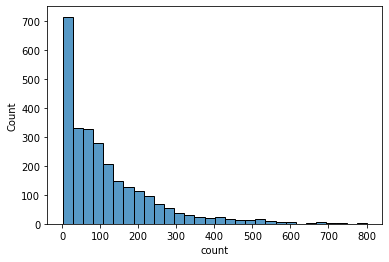

In [219]:
# Check Test Assumptions
# 2. Data is normally distributed 
a=df[df['season']==1]
b=df[df['season']==2]
c=df[df['season']==3]
d=df[df['season']==4] 
sns.histplot(a['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

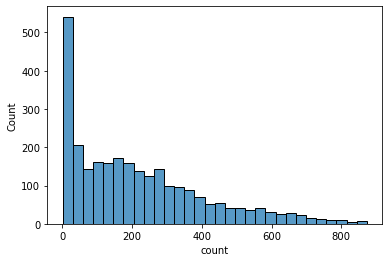

In [220]:
sns.histplot(b['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

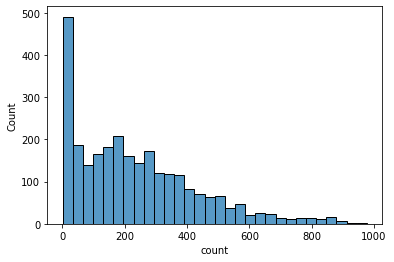

In [221]:
sns.histplot(c['count'],bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

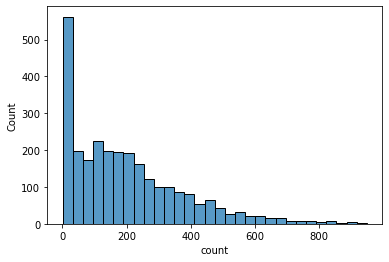

In [222]:
sns.histplot(d['count'],bins=30)

#### The data does not seem bell shaped, so the assumption does not hold true

In [227]:
# 4. Check Test Assumptions
# 5. Variances of different groups are equal
a.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2686.0,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000
mean,1.0,0.026433,0.680566,1.424423,12.530491,15.228956,56.297841,14.636978,15.489576,100.853686,116.343261
std,0.0,0.160450,0.466344,0.635439,5.186492,6.092218,20.158420,9.150257,31.222498,108.082025,125.273974
min,1.0,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,9.020000,10.605000,41.000000,7.001500,1.000000,22.000000,24.000000
50%,1.0,0.000000,1.000000,1.000000,12.300000,14.395000,53.000000,12.998000,5.000000,69.000000,78.000000
75%,1.0,0.000000,1.000000,2.000000,16.400000,20.455000,70.000000,19.999500,15.000000,141.000000,164.000000
max,1.0,1.000000,1.000000,4.000000,29.520000,32.575000,100.000000,51.998700,367.000000,681.000000,801.000000


In [228]:
b.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2733.0,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,2.0,0.017563,0.692645,1.422978,22.823483,26.647098,60.852909,13.405607,47.446762,167.804610,215.251372
std,0.0,0.131381,0.461482,0.638858,5.159616,5.491321,20.179655,7.992956,57.649556,156.156658,192.007843
min,2.0,0.000000,0.000000,1.000000,9.840000,11.365000,16.000000,0.000000,0.000000,0.000000,1.000000
25%,2.0,0.000000,0.000000,1.000000,18.860000,22.725000,45.000000,7.001500,8.000000,39.000000,49.000000
50%,2.0,0.000000,1.000000,1.000000,22.960000,26.515000,61.000000,12.998000,29.000000,133.000000,172.000000
75%,2.0,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,19.001200,63.000000,243.000000,321.000000
max,2.0,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,47.998800,361.000000,782.000000,873.000000


In [229]:
c.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2733.0,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,3.0,0.035126,0.675082,1.366630,28.789111,32.540783,64.123674,11.508862,52.220271,182.196853,234.417124
std,0.0,0.184133,0.468430,0.614799,3.898157,4.594888,17.217859,7.160605,54.638059,164.386982,197.151001
min,3.0,0.000000,0.000000,1.000000,15.580000,12.120000,17.000000,0.000000,0.000000,0.000000,1.000000
25%,3.0,0.000000,0.000000,1.000000,26.240000,30.305000,51.000000,7.001500,10.000000,53.000000,68.000000
50%,3.0,0.000000,1.000000,1.000000,28.700000,33.335000,66.000000,11.001400,36.000000,151.000000,195.000000
75%,3.0,0.000000,1.000000,2.000000,31.160000,35.605000,78.000000,15.001300,74.000000,252.000000,347.000000
max,3.0,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900,350.000000,886.000000,977.000000


In [230]:
d.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2734.0,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000
mean,4.0,0.035113,0.675201,1.459766,16.649239,20.059909,66.173738,11.678147,28.580834,170.407462,198.988296
std,0.0,0.184100,0.468385,0.642749,4.742176,5.264197,17.813446,7.842632,42.596214,154.828357,177.622409
min,4.0,0.000000,0.000000,1.000000,5.740000,7.575000,16.000000,0.000000,0.000000,1.000000,1.000000
25%,4.0,0.000000,0.000000,1.000000,13.120000,15.910000,52.000000,7.001500,4.000000,46.000000,51.000000
50%,4.0,0.000000,1.000000,1.000000,16.400000,20.455000,66.000000,11.001400,14.000000,139.000000,161.000000
75%,4.0,0.000000,1.000000,2.000000,20.500000,24.240000,81.000000,16.997900,33.000000,238.750000,294.000000
max,4.0,1.000000,1.000000,3.000000,30.340000,34.090000,100.000000,43.000600,362.000000,857.000000,948.000000


#### The standard deviation of count is almost similar in all the groups and so equal variances can be assumed

In [231]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
f_stat,p_value=f_oneway(a['count'],b['count'],c['count'],d['count'])
print(f_stat)
print(p_value)

236.94671081032106
6.164843386499654e-149


In [232]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


### Based on the Anova test, we reject the null hypothesis. So we can confirm that season does have an effect on the number of electric cycles rented as is seen in the visual analysis also.

### 2.4 Checking if season has an effect on the weather

<AxesSubplot:xlabel='weather', ylabel='count'>

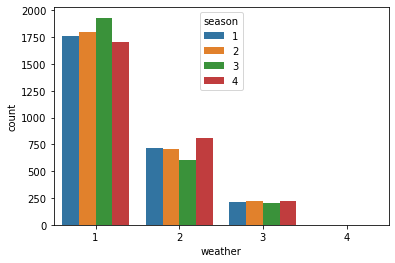

In [262]:
# 1. Visual Analysis
sns.countplot(data=df,x=df['weather'],hue=df['season'])

### Across all 4 seasons, clear weather was found more in summer and mist+cloudy weather in winter

#### 2. Hypothesis Formulation
#### H0 : Season has no effect on the weather
#### Ha : Season has an effect on the weather

#### 3. Select the appropriate test
#### We are comparing a categorical variable(Season) against another categorical variable(weather) 
#### So we will be using the Chisquare test in this case

#### 4. Check Test assumptions
####   1. Data values are categorical - True for season and weather columns in this dataset
####   2. Observations are independent - True for this data
####   3. Each cell is mutually exclusive - True for this data

In [255]:
# Check Test Assumptions
# 4. Expected value in each cell is greater than 5
weather_season=pd.crosstab(index=df['season'],columns=df['weather'])
weather_season

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


#### From the frequency table, we can see that number of values in weather category 4 is less than 5, so we will ignore that category for this analysis.

In [258]:
df_new=df[df['weather']!=4]
weather_season_new=pd.crosstab(index=df_new['season'],columns=df_new['weather'])
weather_season_new

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [261]:
# 5. Finding p value at 95% confidence with a significance value of 0.05
chi_stat,p_value,dof,expected=chi2_contingency(weather_season_new)
print(chi_stat)
print(p_value)
print(dof)
print(expected)

46.10145731073249
2.8260014509929343e-08
6
[[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]


In [247]:
# 6. Conclusion based on the p value
alpha=0.05
if p_value< alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


### Based on the Chisquare test, we reject the null hypothesis. So we can confirm that season does have an effect on the weather.